# TITANIC-MACHINE LEARNING FROM DISASTER SURVIVAL

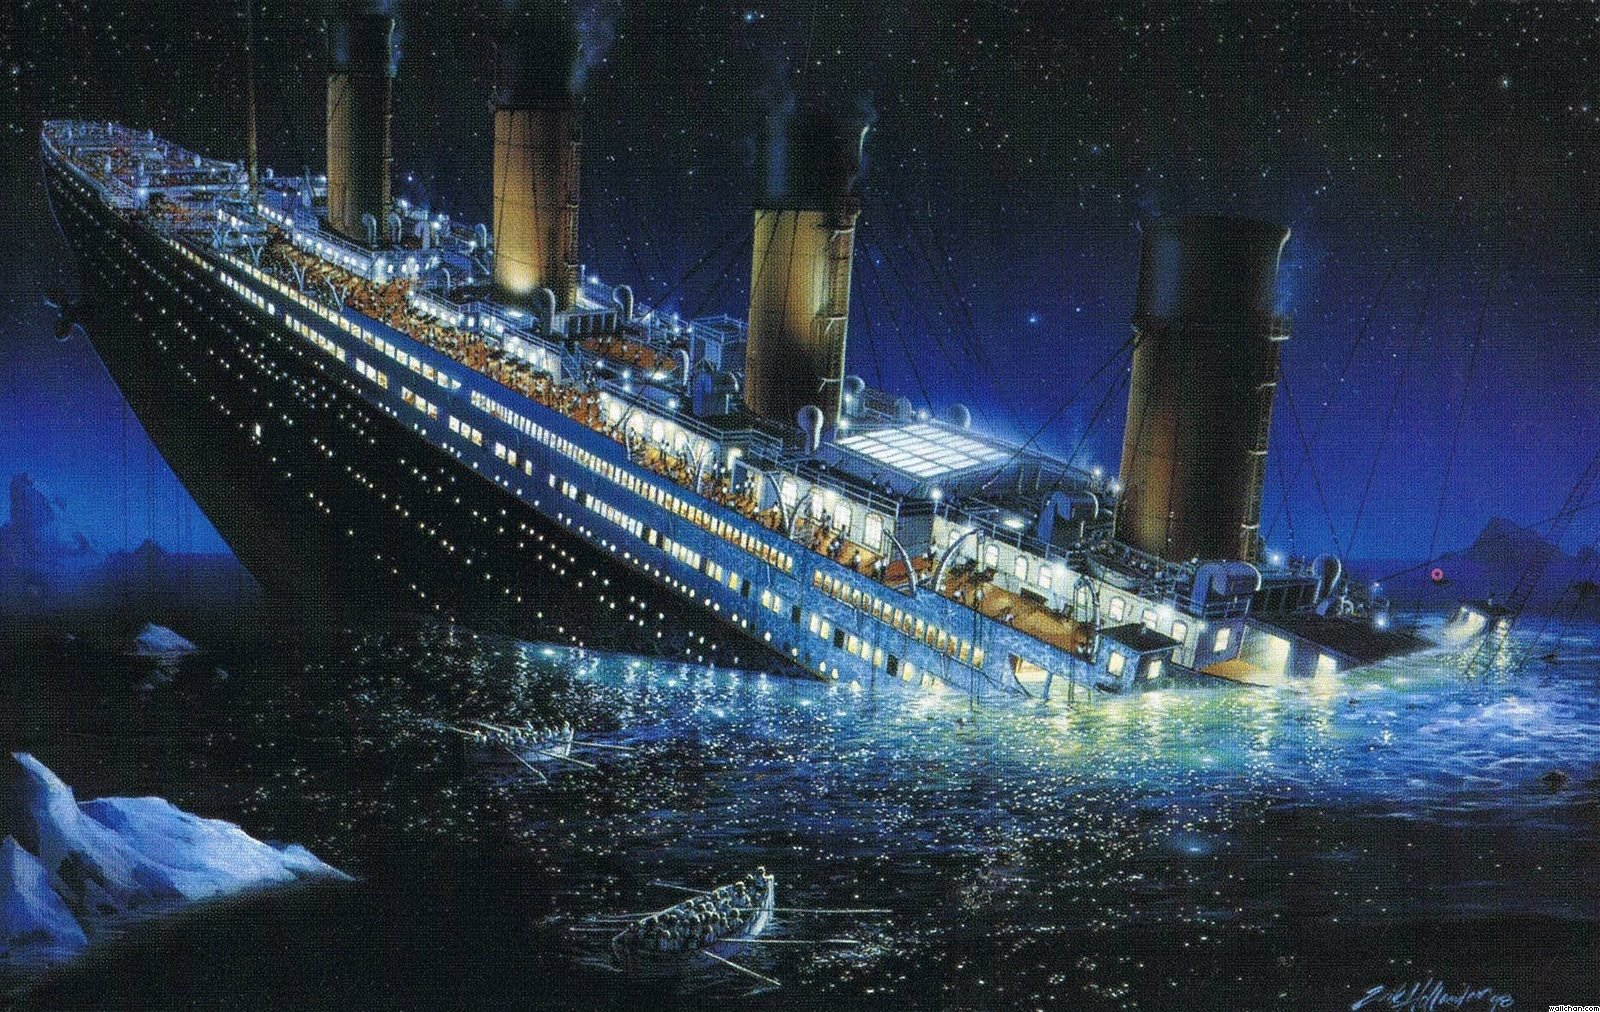

## OBJECTIVE
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than other.
##### Build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).



### IMPORTING IMPORTANT LIBRARIES

In [175]:
import numpy as np
import pandas as pd

#importing plotting libraries

import seaborn as sns
import matplotlib.pyplot as plt

#importing libraries for model selection and validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Data cleaning process for train data
##### import data from csv to python compiler,so that all the operation can be done as here. then no need of calling data at each operation.

In [176]:
df1=pd.read_csv(r'C:\\Users\\91961\\OneDrive\\Desktop\\titanic_train.csv')

In [177]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [178]:
df1.shape

(891, 12)

In [179]:
#data cleaning process
df1.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We find out here, cabin column has the highest number of null values followed by age followed by embarked. in all we have 891 total rows out of which 687, almost 80% rows are null in cabin column.
here we need to find out the features which are important for predicting survivals, on which actually it depends.
so we see cabin would not make that importance in deciding survival of a person and so we can drop it. Similarly we can drop PassangerId, Name, Ticket also.

In [180]:
df2=df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [181]:
df2.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

We need to fill na values in age column. Since age is significant feature in prediction so we can't drop it. Take the help of plots to map the na values.

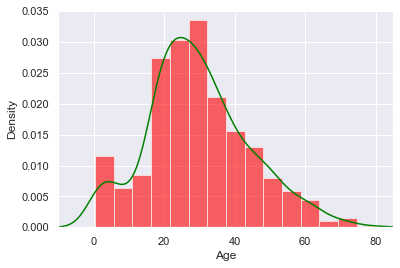

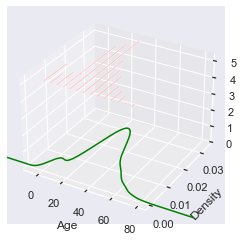

In [182]:
import matplotlib.pyplot as plt
ax = df2["Age"].hist(bins=15, density=True, stacked=False, color='red', alpha=0.6)
df2["Age"].plot(kind='density', color='green')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#projecting 3-D
fig=plt.figure()
ax=fig.add_subplot(projection='3d')
ax = df2["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
df2["Age"].plot(kind='density', color='green')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()




in these plots we can see age is slight positively skewed. Although we have different methods to fill na i.e. 0,backward,forward, mean, interpolation,median. but we need to find out best possibilities. Here we can try out according to interpolation

In [183]:
df2['new_age']=df2["Age"].interpolate(method='linear')

In [184]:
df2.head()
df2.isnull().sum()



Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
new_age       0
dtype: int64

In [185]:
df3=df2.drop(['Age'],axis=1)

In [186]:
df3.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    2
new_age     0
dtype: int64

In [187]:
df3.head()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,new_age
0,0,3,male,1,0,7.2500,S,22.0
1,1,1,female,1,0,71.2833,C,38.0
2,1,3,female,0,0,7.9250,S,26.0
3,1,1,female,1,0,53.1000,S,35.0
4,0,3,male,0,0,8.0500,S,35.0


In [188]:
df4=df3.dropna()
df4.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
new_age     0
dtype: int64

In [189]:
df4.describe()


,Survived,Pclass,SibSp,Parch,Fare,new_age
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,0.524184,0.382452,32.096681,29.680450
std,0.486260,0.834700,1.103705,0.806761,49.697504,13.872944
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.420000
25%,0.000000,2.000000,0.000000,0.000000,7.895800,21.000000
50%,0.000000,3.000000,0.000000,0.000000,14.454200,28.500000
75%,1.000000,3.000000,1.000000,0.000000,31.000000,38.000000
max,1.000000,3.000000,8.000000,6.000000,512.329200,80.000000


In [190]:
#converting categorical variables into dummy variables
type(df4)
df4.dtypes


Survived      int64
Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
new_age     float64
dtype: object

In [191]:
df5=pd.get_dummies(df4,columns=["Sex"])
df6=pd.get_dummies(df5,columns=["Embarked"])
df6.head()


,Survived,Pclass,SibSp,Parch,Fare,new_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,0,7.2500,22.0,0,1,0,0,1
1,1,1,1,0,71.2833,38.0,1,0,1,0,0
2,1,3,0,0,7.9250,26.0,1,0,0,0,1
3,1,1,1,0,53.1000,35.0,1,0,0,0,1
4,0,3,0,0,8.0500,35.0,0,1,0,0,1


In [192]:
#plotting heatmap for checking correlation
train_corr=df6.corr()
train_corr

,Survived,Pclass,SibSp,Parch,Fare,new_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.034040,0.083151,0.255290,-0.066659,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,0.081656,0.016824,-0.548193,-0.301600,-0.127741,0.127741,-0.245733,0.220558,0.076466
SibSp,-0.034040,0.081656,1.000000,0.414542,0.160887,-0.212594,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,0.414542,1.000000,0.217532,-0.169047,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.160887,0.217532,1.000000,0.084320,0.179958,-0.179958,0.270731,-0.116684,-0.163758
new_age,-0.066659,-0.301600,-0.212594,-0.169047,0.084320,1.000000,-0.066133,0.066133,0.017462,0.020081,-0.027941
Sex_female,0.541585,-0.127741,0.116348,0.247508,0.179958,-0.066133,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,-0.541585,0.127741,-0.116348,-0.247508,-0.179958,0.066133,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,0.169966,-0.245733,-0.060074,-0.011588,0.270731,0.017462,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.026692,-0.081585,-0.116684,0.020081,0.075217,-0.075217,-0.148646,1.000000,-0.499261


Text(0.5, 1.0, 'Heatmap for train data')

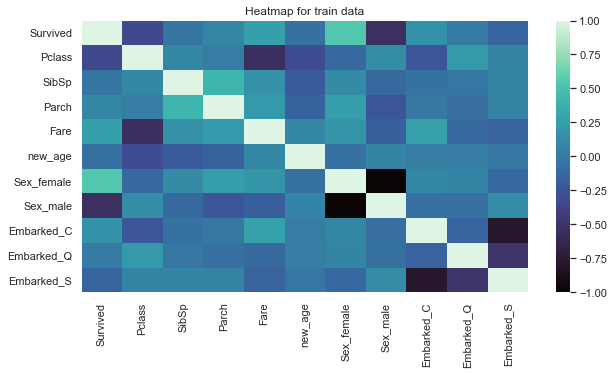

In [193]:
import seaborn as sns
sns.set_theme()
sns.color_palette("mako", as_cmap=True)
fig,ab=plt.subplots(figsize=(10,5))
sns.heatmap(train_corr,cmap='mako')
ab.set_title('Heatmap for train data')

### Data cleaning process for test data
##### import data from csv to python compiler,so that all the operation can be done as here. then no need of calling data at each operation.

In [194]:
dft1=pd.read_csv(r'C:\\Users\\91961\\OneDrive\\Desktop\\titanic_test.csv')
dft1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [195]:
dft1.shape

(418, 11)

In [196]:
dft1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [197]:
#again cabin has highest null values.So,we'll drop insignificant features.
dft2=dft1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [198]:
dft2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


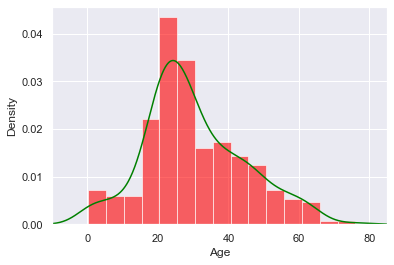

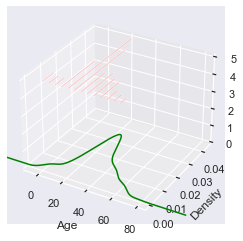

In [199]:
#plotting to fill na values in age.
import matplotlib.pyplot as plt
ay = dft2["Age"].hist(bins=15, density=True, stacked=False, color='red', alpha=0.6)
dft2["Age"].plot(kind='density', color='green')
ay.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#projecting 3-D
fig=plt.figure()
ay=fig.add_subplot(projection='3d')
ay = dft2["Age"].hist(bins=15, density=True, stacked=True, color='red', alpha=0.6)
dft2["Age"].plot(kind='density', color='green')
ay.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()



In [200]:
dft2['new_age']=dft2['Age'].interpolate(method='linear')

In [201]:
dft2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_age
0,3,male,34.5,0,0,7.8292,Q,34.5
1,3,female,47.0,1,0,7.0000,S,47.0
2,2,male,62.0,0,0,9.6875,Q,62.0
3,3,male,27.0,0,0,8.6625,S,27.0
4,3,female,22.0,1,1,12.2875,S,22.0


In [202]:
dft3=dft2.drop(["Age"],axis=1)

In [203]:
dft3.head()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,new_age
0,3,male,0,0,7.8292,Q,34.5
1,3,female,1,0,7.0000,S,47.0
2,2,male,0,0,9.6875,Q,62.0
3,3,male,0,0,8.6625,S,27.0
4,3,female,1,1,12.2875,S,22.0


In [204]:
dft3.describe()

,Pclass,SibSp,Parch,Fare,new_age
count,418.000000,418.000000,418.000000,417.000000,418.000000
mean,2.265550,0.447368,0.392344,35.627188,30.045251
std,0.841838,0.896760,0.981429,55.907576,13.502708
min,1.000000,0.000000,0.000000,0.000000,0.170000
25%,1.000000,0.000000,0.000000,7.895800,21.500000
50%,3.000000,0.000000,0.000000,14.454200,27.700000
75%,3.000000,1.000000,0.000000,31.500000,38.875000
max,3.000000,8.000000,9.000000,512.329200,76.000000


In [205]:
#converting categorical variables into dummy variables
type(dft3)
dft3.dtypes

Pclass        int64
Sex          object
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
new_age     float64
dtype: object

In [241]:
dft4=pd.get_dummies(dft3,columns=["Sex"])

In [242]:
dft5=pd.get_dummies(dft4,columns=["Embarked"])

In [243]:
dft5.head()

,Pclass,SibSp,Parch,Fare,new_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,7.8292,34.5,0,1,0,1,0
1,3,1,0,7.0000,47.0,1,0,0,0,1
2,2,0,0,9.6875,62.0,0,1,0,1,0
3,3,0,0,8.6625,27.0,0,1,0,0,1
4,3,1,1,12.2875,22.0,1,0,0,0,1


In [244]:
dft5.shape

(418, 10)

### Implementing the Logistic Regression model for prediction
first split into train and test

In [245]:
x_train=df6.drop(["Survived"],axis=1)
x_train.head()

,Pclass,SibSp,Parch,Fare,new_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,1,0,7.2500,22.0,0,1,0,0,1
1,1,1,0,71.2833,38.0,1,0,1,0,0
2,3,0,0,7.9250,26.0,1,0,0,0,1
3,1,1,0,53.1000,35.0,1,0,0,0,1
4,3,0,0,8.0500,35.0,0,1,0,0,1


In [246]:
y_train=df6["Survived"]
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [247]:
x_test=dft5
x_test.head()

,Pclass,SibSp,Parch,Fare,new_age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0,0,7.8292,34.5,0,1,0,1,0
1,3,1,0,7.0000,47.0,1,0,0,0,1
2,2,0,0,9.6875,62.0,0,1,0,1,0
3,3,0,0,8.6625,27.0,0,1,0,0,1
4,3,1,1,12.2875,22.0,1,0,0,0,1


In [248]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=50)


In [249]:
import warnings
warnings.filterwarnings("ignore")
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

##### import libraries for metrics and reporting


In [250]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report



In [251]:
metrics.confusion_matrix(y_test, y_pred)

array([[145,  18],
       [ 32,  72]], dtype=int64)

In [252]:
metrics.accuracy_score(y_test, y_pred)

0.8127340823970037

In [253]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       163
           1       0.80      0.69      0.74       104

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



In [254]:
log_reg.coef_

array([[-9.46642096e-01, -2.37619892e-01, -1.30672736e-01,
         1.65552903e-03, -3.78138560e-02,  2.15208807e+00,
        -4.49085285e-01,  6.69480820e-01,  8.60295152e-01,
         1.73226809e-01]])

In [255]:
log_reg.intercept_

array([1.94699438])

In [256]:
log_reg.predict_proba(x_test)

array([[0.64071981, 0.35928019],
       [0.92532623, 0.07467377],
       [0.89114256, 0.10885744],
       [0.92223106, 0.07776894],
       [0.03741091, 0.96258909],
       [0.71569948, 0.28430052],
       [0.88625647, 0.11374353],
       [0.6437714 , 0.3562286 ],
       [0.93047737, 0.06952263],
       [0.84059239, 0.15940761],
       [0.68471012, 0.31528988],
       [0.81506135, 0.18493865],
       [0.35026176, 0.64973824],
       [0.07307225, 0.92692775],
       [0.90201628, 0.09798372],
       [0.19015167, 0.80984833],
       [0.8885788 , 0.1114212 ],
       [0.33342362, 0.66657638],
       [0.86694142, 0.13305858],
       [0.87544769, 0.12455231],
       [0.39724977, 0.60275023],
       [0.28080294, 0.71919706],
       [0.99101611, 0.00898389],
       [0.16730349, 0.83269651],
       [0.9447178 , 0.0552822 ],
       [0.86567514, 0.13432486],
       [0.86869067, 0.13130933],
       [0.82374094, 0.17625906],
       [0.90154467, 0.09845533],
       [0.86689128, 0.13310872],
       [0.